In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torch.optim as optim
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import to_dense_adj
from torch_geometric.transforms import NormalizeFeatures
from nn import GCNLayer, GCN

In [2]:
# create the adjaceny matrix from the edge index
def create_adj(edge_index, num_nodes):
    # edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    adj = np.zeros((num_nodes, num_nodes), dtype=int)
    for i, j in edge_index:
        adj[i-1, j-1] = 1
        adj[j-1, i-1] = 1
    
    adj = torch.tensor(adj, dtype=torch.float) + torch.eye(num_nodes)
    return adj

data = np.loadtxt("ucidata-zachary/out.ucidata-zachary", dtype=int, skiprows=2)

num_nodes = 34
adj = create_adj(data, num_nodes)
features = torch.eye(num_nodes)
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21]
labels = [0 if i in labels else 1 for i in range(num_nodes)]
labels = torch.tensor(labels, dtype=torch.long)


In [3]:
# model and optimizer
model = GCN(nin=features.shape[1], nout=16, nhid=16, nclass=2)
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [7]:
# train the model
model.train()
for epoch in range(100):
    optimizer.zero_grad()
    output = model(features, adj)           # n x 2
    loss = F.cross_entropy(output, labels)  # for each node, cross entropy loss compares the probability of the labels to the true label
    loss.backward()
    optimizer.step()

    print(f"Epoch: {epoch}, Loss: {loss.item()}")



Epoch: 0, Loss: 0.0005003078258596361
Epoch: 1, Loss: 0.0004950679722242057
Epoch: 2, Loss: 0.0004899042542092502
Epoch: 3, Loss: 0.0004848343087360263
Epoch: 4, Loss: 0.000479840615298599
Epoch: 5, Loss: 0.0004749301297124475
Epoch: 6, Loss: 0.00047009592526592314
Epoch: 7, Loss: 0.000465344957774505
Epoch: 8, Loss: 0.0004606599104590714
Epoch: 9, Loss: 0.000456047710031271
Epoch: 10, Loss: 0.0004515118489507586
Epoch: 11, Loss: 0.00044703486491926014
Epoch: 12, Loss: 0.0004426483064889908
Epoch: 13, Loss: 0.00043831366929225624
Epoch: 14, Loss: 0.0004340554296504706
Epoch: 15, Loss: 0.0004298491985537112
Epoch: 16, Loss: 0.0004257054242771119
Epoch: 17, Loss: 0.0004216311499476433
Epoch: 18, Loss: 0.00041761595639400184
Epoch: 19, Loss: 0.0004136631905566901
Epoch: 20, Loss: 0.000409752014093101
Epoch: 21, Loss: 0.000405903352657333
Epoch: 22, Loss: 0.0004021103086415678
Epoch: 23, Loss: 0.0003983762871939689
Epoch: 24, Loss: 0.00039470146293751895
Epoch: 25, Loss: 0.0003910821687895

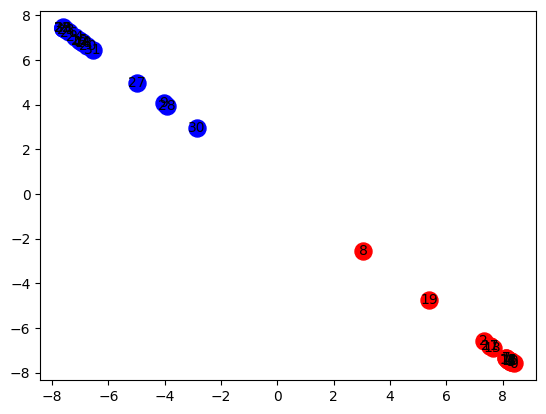

In [8]:
# plot the outputs on a 2D plane
plt.scatter(output[:, 0].detach().numpy(), output[:, 1].detach().numpy())

# if the ith node is labeled 0, color it red, else blue
for i in range(num_nodes):
    if labels[i] == 0:
        plt.scatter(output[i, 0].detach().numpy(), output[i, 1].detach().numpy(), color='red', s=150)
    else:
        plt.scatter(output[i, 0].detach().numpy(), output[i, 1].detach().numpy(), color='blue', s=150)

# label the nodes, centered
for i in range(num_nodes):
    plt.text(output[i, 0].detach().numpy(), output[i, 1].detach().numpy(), str(i), ha='center', va='center')

plt.show()